Lipisha Chaudhary <br>
lc2919@rit.edu

# JUPYTER NOTEBOOK FOR HOMEWORK 2
Segment the foreground from one image and transfer it to another image

In [1]:
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt 
import matplotlib.image as plt_img
from scipy.ndimage.filters import convolve
import os
from sklearn.cluster import KMeans

from makeLMfilters import makeLMfilters


In [2]:
#Convert the image to grayscale
#   Define a function segmentImg which takes in an image and returns the foreground labels
#   The arguments to segmentImg are imgFilename
#   and k (the number of clusters)
def segmentImg(imgFilename, k):
    #1. Load and display the image from which you want to segment the foreground from the background
    #  Make sure to convert your image to grayscale after loading
    '****Put your code here.'
    if os.path.isfile(os.getcwd() + '/' + imgFilename):
        img_path, img_format = imgFilename.split('.')
        img_folder, img_name = img_path.split('/')
        img = plt_img.imread(imgFilename)
        grayscale_img = skimage.color.rgb2gray(img)
        '''
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        ax = axes.ravel()
        ax[0].imshow(img)
        ax[0].set_title(img_name.title() +" Image")
        ax[1].imshow(grayscale_img,  cmap='gray')
        ax[1].set_title("Grayscale Image")
        fig.tight_layout()
        plt.show()
    
        '''
        
    #2. Create an overcomplete bank of filters F (make sure you check the dimensions of the returned array)
    #
    '****Put your code here.'
    F = makeLMfilters()
    ## ------------------------------------------------------------
    '''
    fig, axes = plt.subplots(6, 8, figsize=(10, 10))
    ax1 = axes.ravel()
    for i in range(0,F.shape[2]):
        ax1[i].imshow(F[:][:][i],cmap='gray')
    '''
    ## ------------------------------------------------------------
        
    #3. Convolve the input image with every filter in the bank of filters to get a response array 
    #
    '****Put your code here.'
    size_temp=(grayscale_img.shape[0],grayscale_img.shape[1],F.shape[2])
    yt = np.zeros(size_temp)
    ## ------------------------------------------------------------
    '''
    fig, axes = plt.subplots(6, 8, figsize=(15, 15))
    ax1 = axes.ravel()
    '''
    ## ------------------------------------------------------------
    for i in range(0,size_temp[2]):
        yt[:, : , i] = convolve(grayscale_img, F[:, :, i])
        ##### ax1[i].imshow(yt[i],cmap='gray')
        
    #4.Take the absolute values of the responses and 
    #  reshape the reponse tensor into a matrix of size [row*cols, num_filters]
    '****Put your code here.'
    for i in range(size_temp[0]):
        for j in range(size_temp[1]):
            for l in range(size_temp[2]):
                yt[i, j, l] = abs(yt[i, j, l])
    X = yt.reshape((size_temp[0]*size_temp[1],size_temp[2]))
    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    #  
    '****Put your code here.'
    k_means = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = k_means.labels_
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    idx = labels.reshape((size_temp[0], size_temp[1]))
    
    print('***Segmentation done***')
    return idx.astype(np.float)



In [3]:
"""
You are now given a second function tansferImg with the arguments:
    fgs: foreground label ids from clustering
    idxImg: the reshaped indexed image also from clustering
    sImgFilename: source image (a color image to pick pixels from)
    tImgFilename: target image (also a color image to transfer pixels to)
    This function is customized to work for the images provided for the homework
"""
def transferImg(fgs, idxImg, sImgFilename, tImgFilename):

    # Read the images, estimate their dimensions
    sImg = skimage.io.imread(sImgFilename)
    tImg = skimage.io.imread(tImgFilename)
    rows, cols, clrs = sImg.shape

    # Crop the source and indexed images
    idxImg = idxImg[25:rows-25, 25:cols-25]
    sImg = sImg[25:rows-25, 25:cols-25]
    rows, cols, clrs = sImg.shape
    
    # Resize them by so they fit in target file, tImg
    idxImg = resize(idxImg,(int(idxImg.shape[0]/1.5), int(idxImg.shape[1]/1.5)),anti_aliasing=True)
    #idxImg = 255*resize(idxImg,(int(idxImg.shape[0]/1.5), int(idxImg.shape[1]/1.5)),anti_aliasing=True)
    idxImg = idxImg.astype(np.uint8)
    sImg = 255*resize(sImg, (int(sImg.shape[0]/1.5), int(sImg.shape[1]/1.5)), anti_aliasing=True)
    sImg = sImg.astype(np.uint8)
    rows, cols, clrs = sImg.shape
    
    # Transfer idx onto tImg
    for i in range(rows): 
        for j in range(cols):
            if idxImg[i,j] in fgs:
                # Coordinate offsets from boundary
                iOff = i+200
                jOff = j+100 
                tImg[iOff,jOff,0] = sImg[i,j,0]
                tImg[iOff,jOff,1] = sImg[i,j,1]
                tImg[iOff,jOff,2] = sImg[i,j,2]

    print('***transfer done')
    return tImg


***Segmentation done***
***transfer done


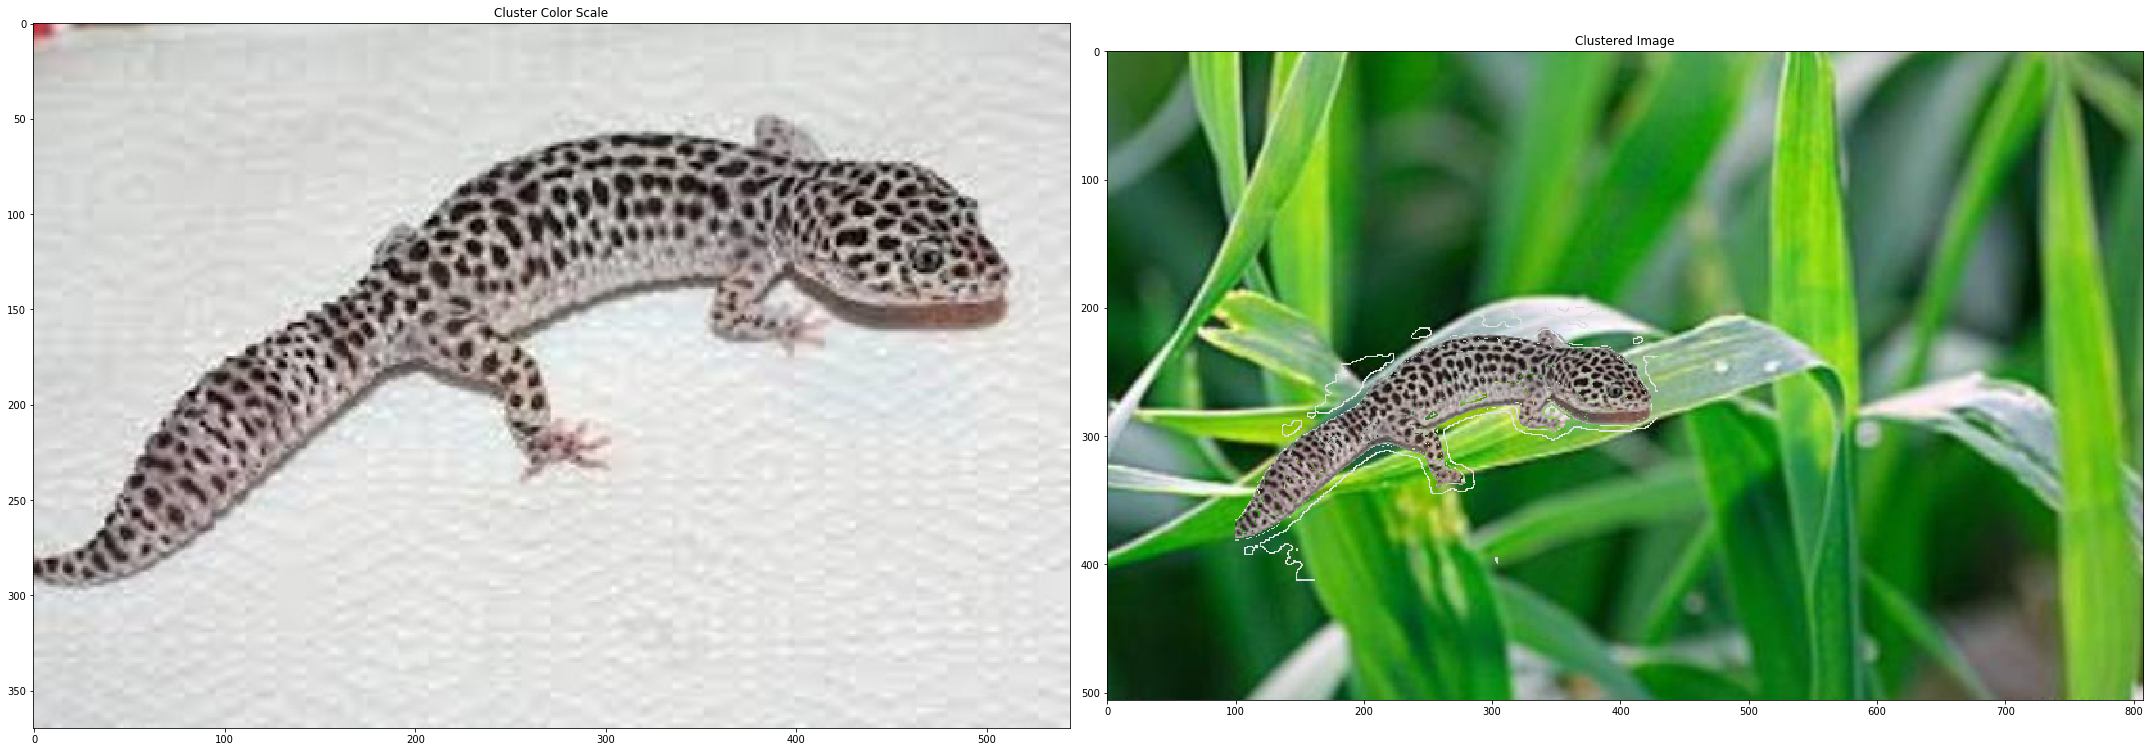

In [4]:
#7. Test your segmentation function with an image file and # of clusters, k
# Below is an example of how to call the transfer function
# Insert only the numbers that correspond to the foreground labels in the transferImg function

img = 'images/gecko.jpg'
img_filter = plt_img.imread(img)
img_path, img_format = img.split('.')
img_folder, img_name = img.split('/')
idx = segmentImg('images/gecko.jpg', 6)
trImg_texture = transferImg([0,2,4,5], idx, 'images/gecko.jpg', 'images/bg2.jpg')#with RGB


fig, axes = plt.subplots(1, 2, figsize=(30, 15))
ax = axes.ravel()
ax[0].imshow(img_filter)
ax[0].set_title("Cluster Color Scale")
ax[1].imshow(trImg_texture)
ax[1].set_title("Clustered Image")
fig.tight_layout()
plt.show()

# Color based Segmentation

### LAB Colorspace

In [5]:
#8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClrLAB(imgFilename, k):
    '****Put your code here.'
    if os.path.isfile(os.getcwd() + '/' + imgFilename):
        img_path, img_format = imgFilename.split('.')
        img_folder, img_name = img_path.split('/')
        img = plt_img.imread(imgFilename)
        lab = skimage.color.rgb2lab(img)
        #hsv_image = skimage.color.rgb2hsv(img)
    X_lab = lab.reshape((lab.shape[0]*lab.shape[1],lab.shape[2]))
    k_means = KMeans(n_clusters=k, random_state=0).fit(X_lab)
    labels = k_means.labels_
    idx = labels.reshape((lab.shape[0], lab.shape[1]))
    
    print('***Segmentation done***')
    return idx.astype(np.float)


***Segmentation done***
***transfer done


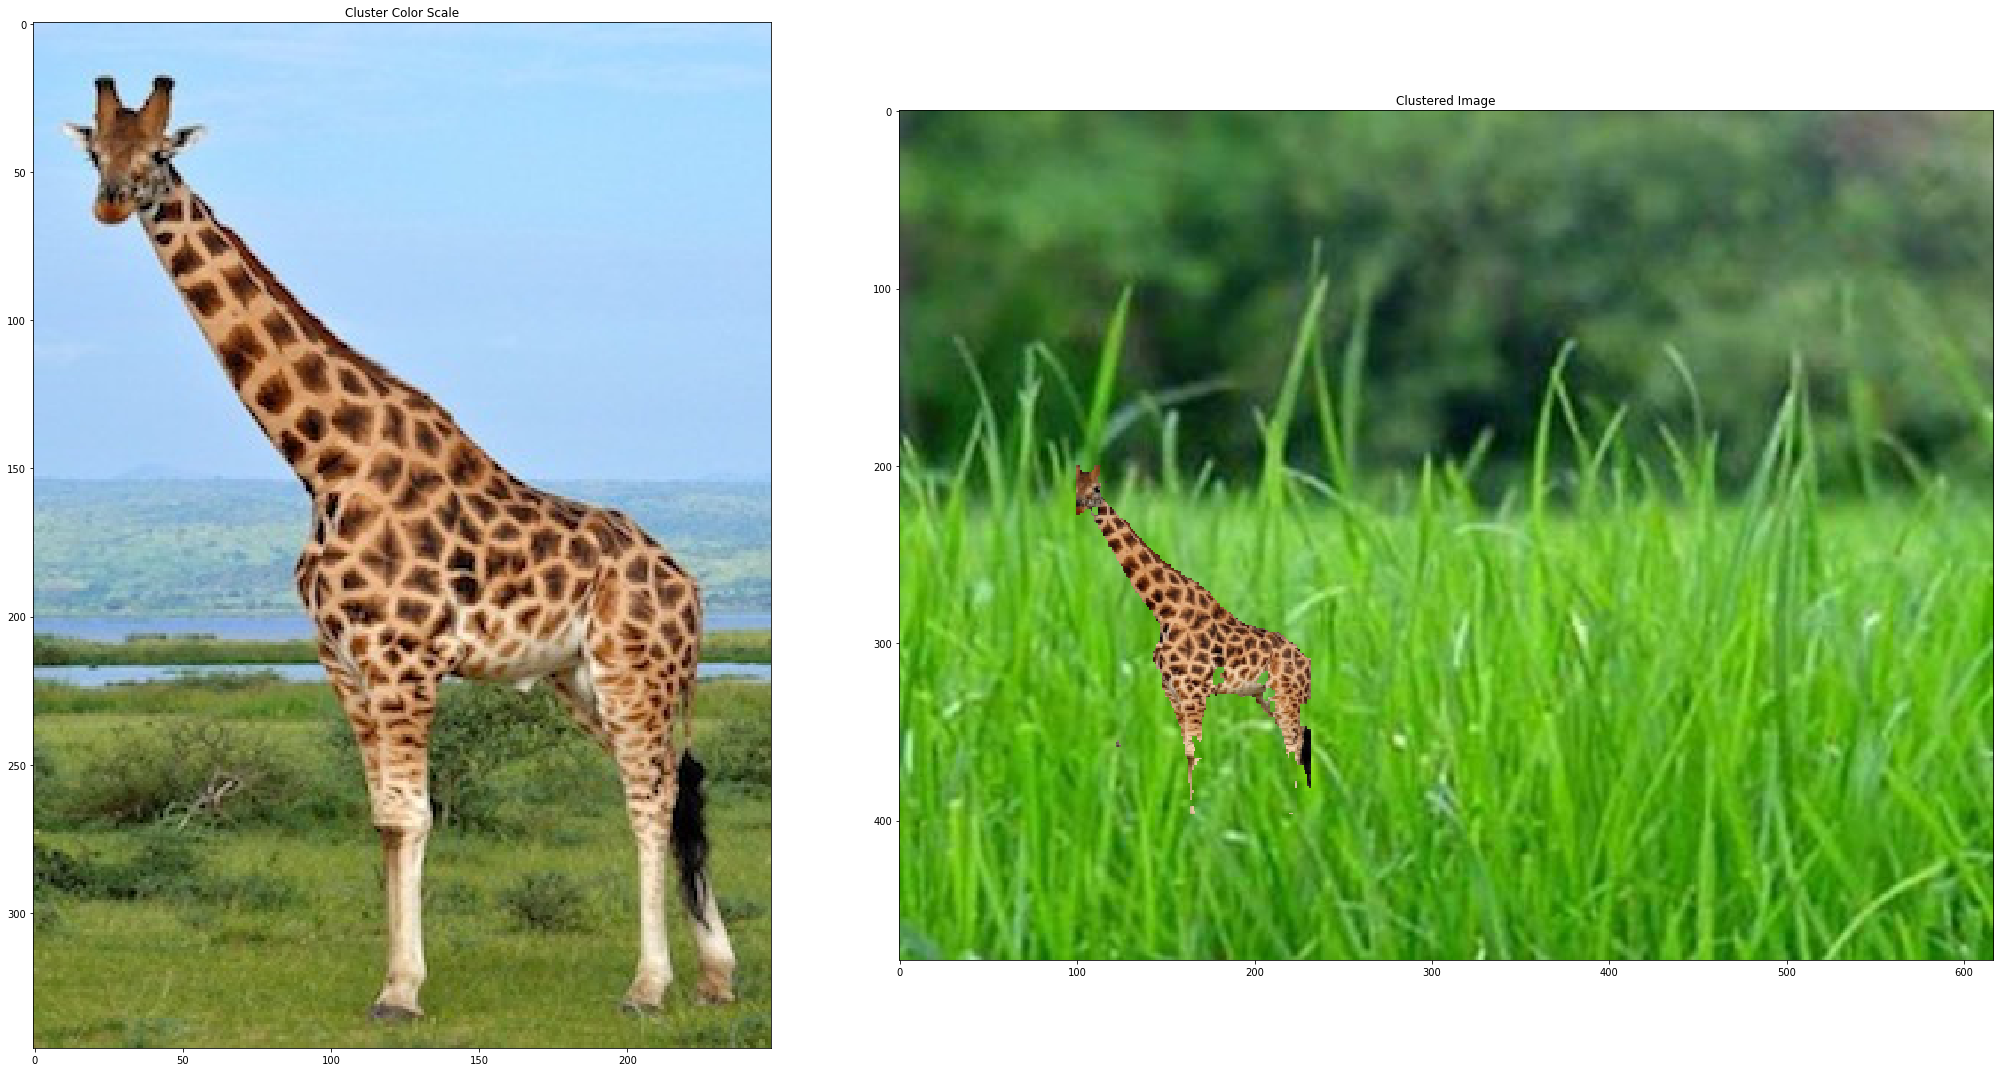

In [6]:
#9. Again test your new color-based segmentation function
#   The same transferImg function should work here also.
img = plt_img.imread('images/giraffe.jpg')
idx = segmentImgClrLAB('images/giraffe.jpg', 3)

trImg_LAB = transferImg([2], idx, 'images/giraffe.jpg', 'images/bg3.jpg')#with Lab

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Cluster Color Scale")
ax[1].imshow(trImg_LAB)
ax[1].set_title("Clustered Image")
fig.tight_layout()
plt.show()


### HSV Colorspace

In [7]:
def segmentImgClrHSV(imgFilename, k):
    '****Put your code here.'
    if os.path.isfile(os.getcwd() + '/' + imgFilename):
        img_path, img_format = imgFilename.split('.')
        img_folder, img_name = img_path.split('/')
        img = plt_img.imread(imgFilename)
        hsv_image = skimage.color.rgb2hsv(img)
    X_hsv = hsv_image.reshape((hsv_image.shape[0]*hsv_image.shape[1],hsv_image.shape[2]))
    
    k_means = KMeans(n_clusters=k, random_state =0).fit(X_hsv)
    labels = k_means.labels_
    
    idx = labels.reshape((hsv_image.shape[0], hsv_image.shape[1]))
    
    
    print('***Segmentation done***')
    return idx.astype(np.float)


***Segmentation done***
***transfer done


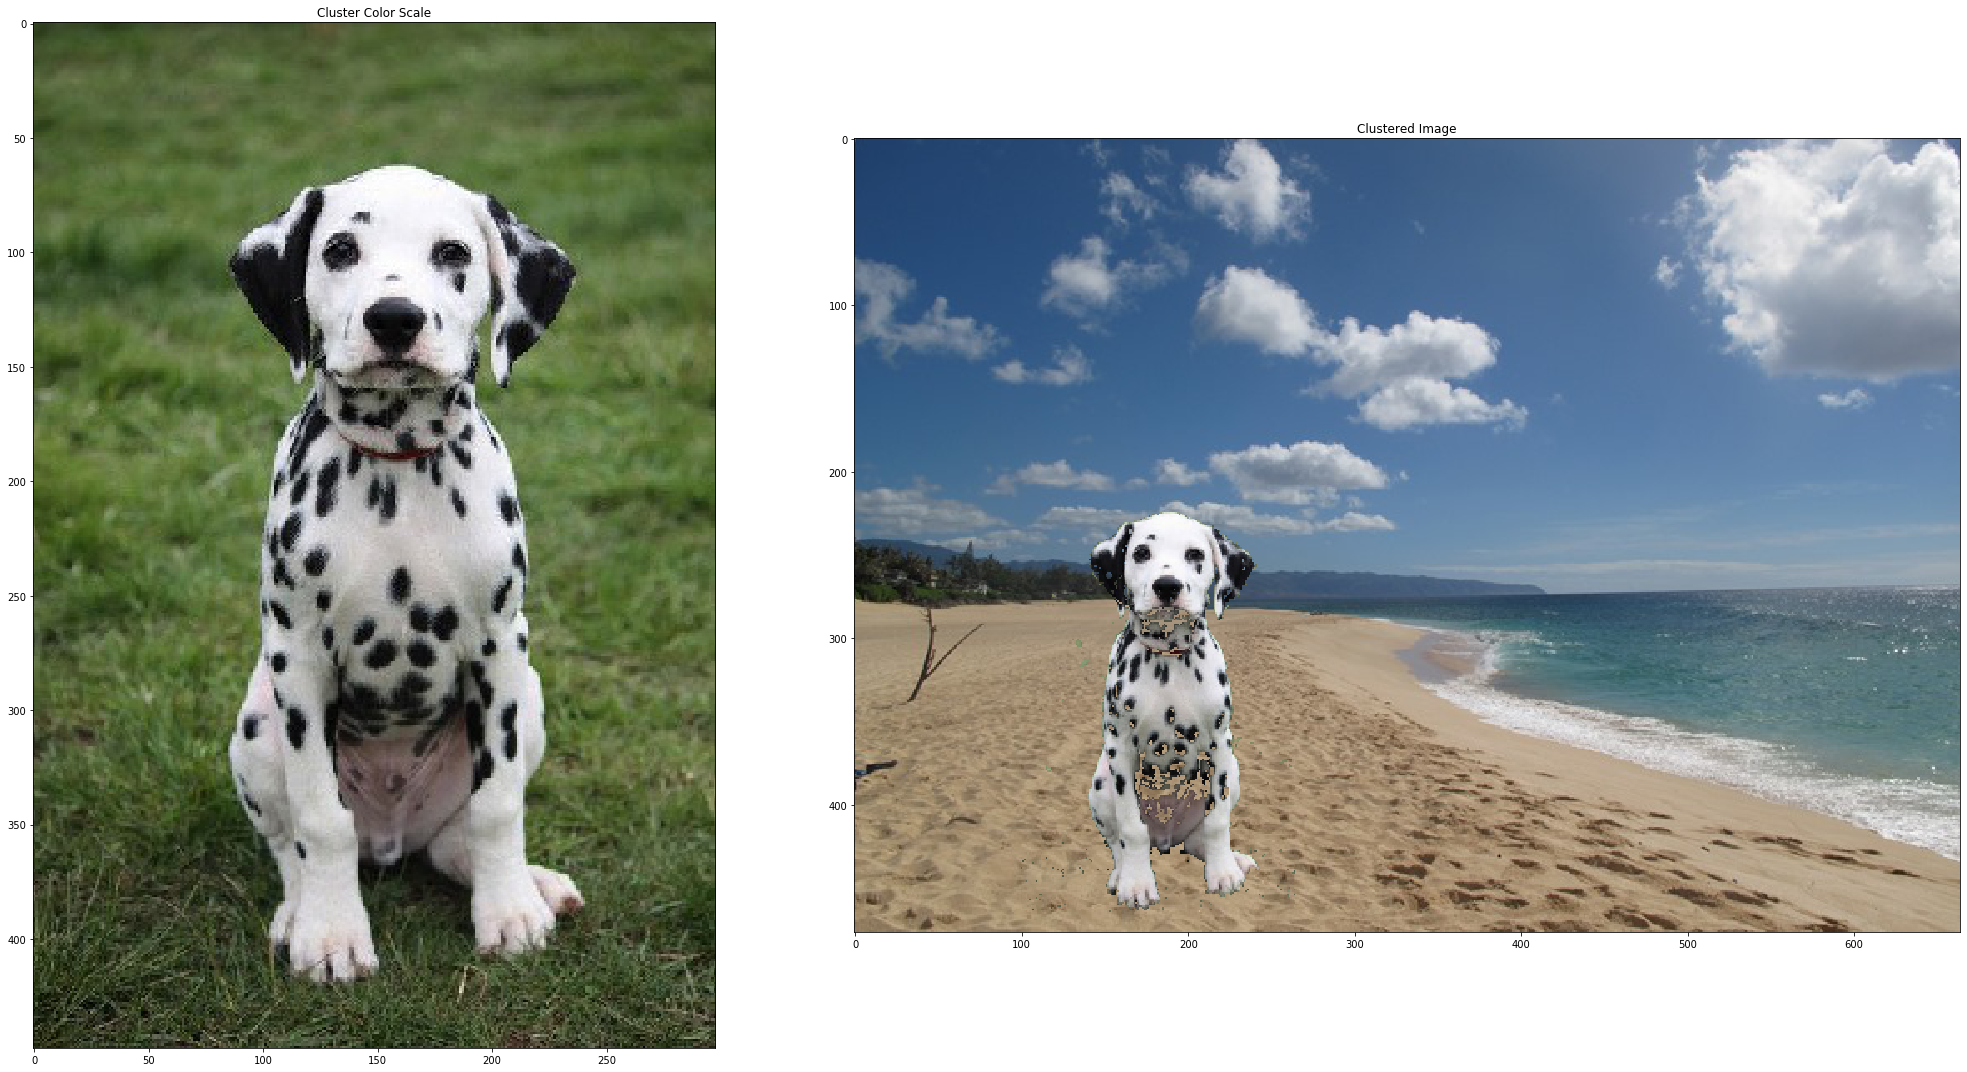

In [8]:
#10 Test with a different colorspace
img = plt_img.imread('images/dog.jpg')
idx = segmentImgClrHSV('images/dog.jpg', 4)
trImg_HSV = transferImg([1,2,3], idx, 'images/dog.jpg', 'images/bg.jpg')#with RGB


fig, axes = plt.subplots(1, 2, figsize=(30, 15))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Cluster Color Scale")
ax[1].imshow(trImg_HSV)
ax[1].set_title("Clustered Image")
fig.tight_layout()
plt.show()



### RGB Colorspace

In [9]:
def segmentImgClr(imgFilename, k):
    '****Put your code here.'
    if os.path.isfile(os.getcwd() + '/' + imgFilename):
        img_path, img_format = imgFilename.split('.')
        img_folder, img_name = img_path.split('/')
        img = plt_img.imread(imgFilename)
        rgb_image = skimage.color.xyz2rgb(img)
        
    #X_rgb = img.reshape((rgb_image.shape[0]*rgb_image.shape[1],rgb_image.shape[2]))
    X = img.reshape((rgb_image.shape[0]*rgb_image.shape[1],rgb_image.shape[2]))
    k_means = KMeans(n_clusters=k, random_state =0).fit(X)
    labels = k_means.labels_
    
    idx = labels.reshape((rgb_image.shape[0], rgb_image.shape[1]))
    
    print('***Segmentation done***')
    return idx.astype(np.float)


***Segmentation done***
***transfer done


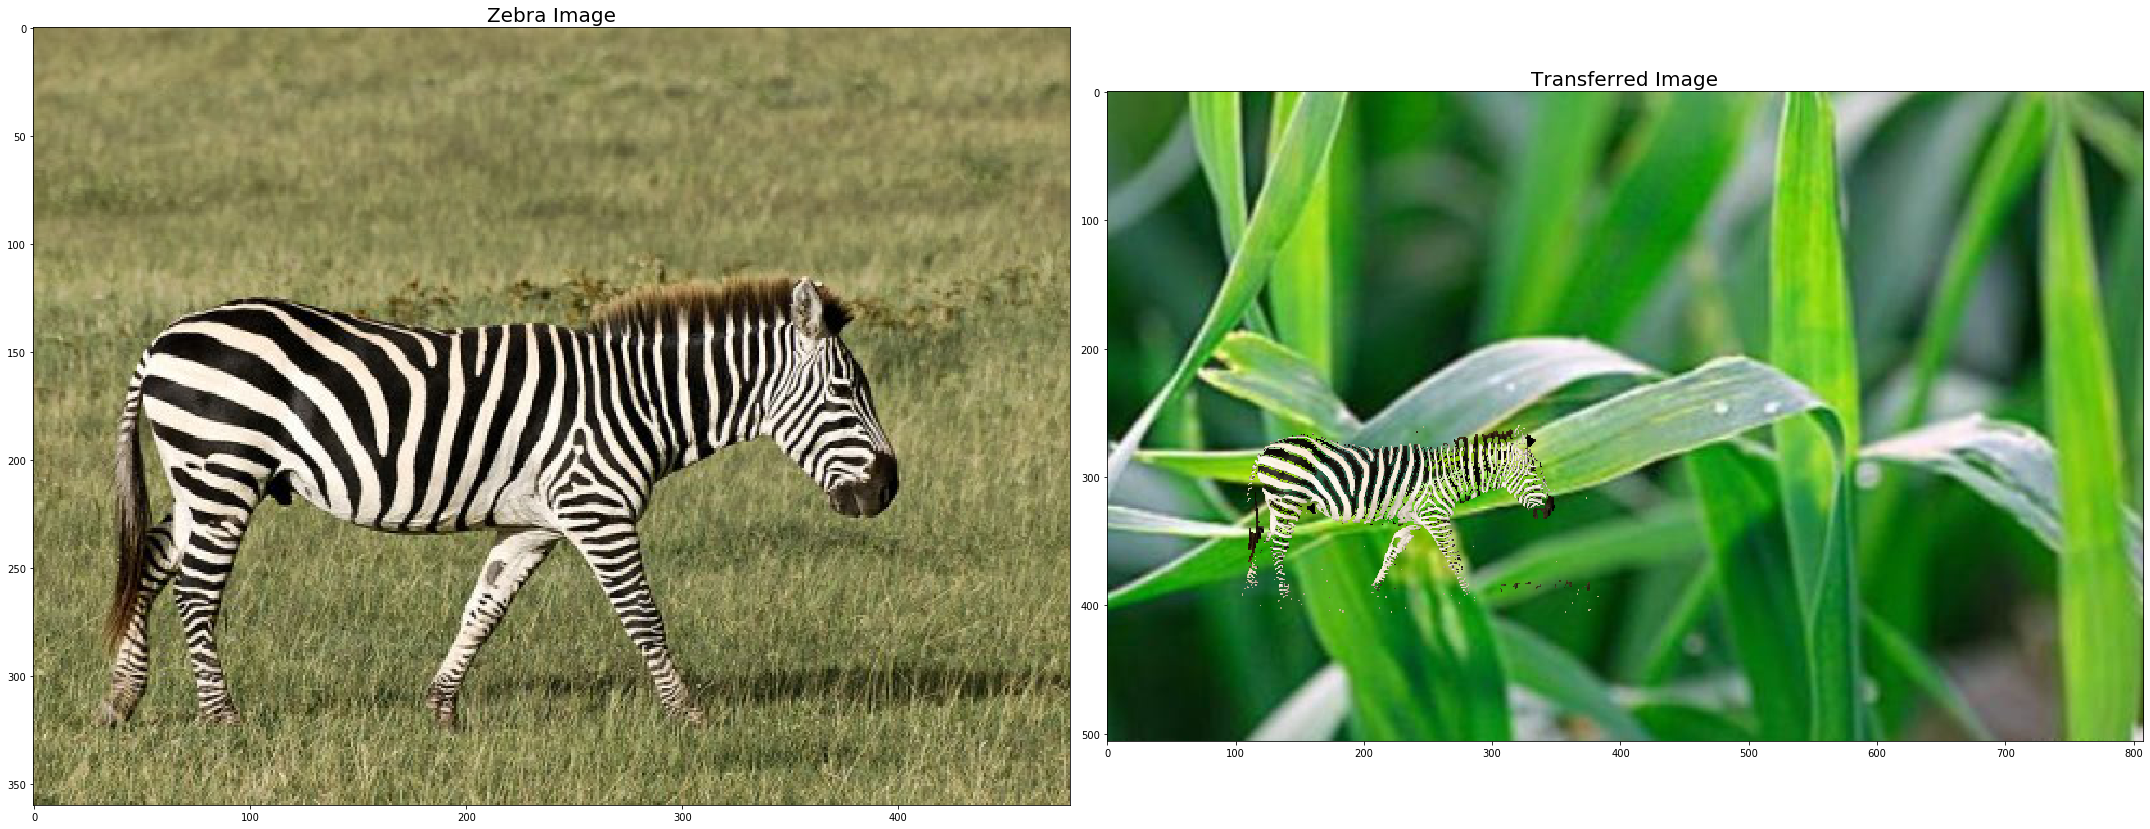

In [11]:
#10 Test with a different colorspace
img_rgb = 'images/zebra.jpg'
img = plt_img.imread(img_rgb)
img_path, img_format = img_rgb.split('.')
img_folder, img_name = img_path.split('/')
idx = segmentImgClr(img_rgb, 3)
trImg_rgb = transferImg([1,2], idx, img_rgb, 'images/bg2.jpg')#with RGB


fig, axes = plt.subplots(1, 2, figsize=(30, 15))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title(img_name.title() +" Image", fontsize=20)
ax[1].imshow(trImg_rgb)
ax[1].set_title("Transferred Image", fontsize=20)
fig.tight_layout()
plt.show()


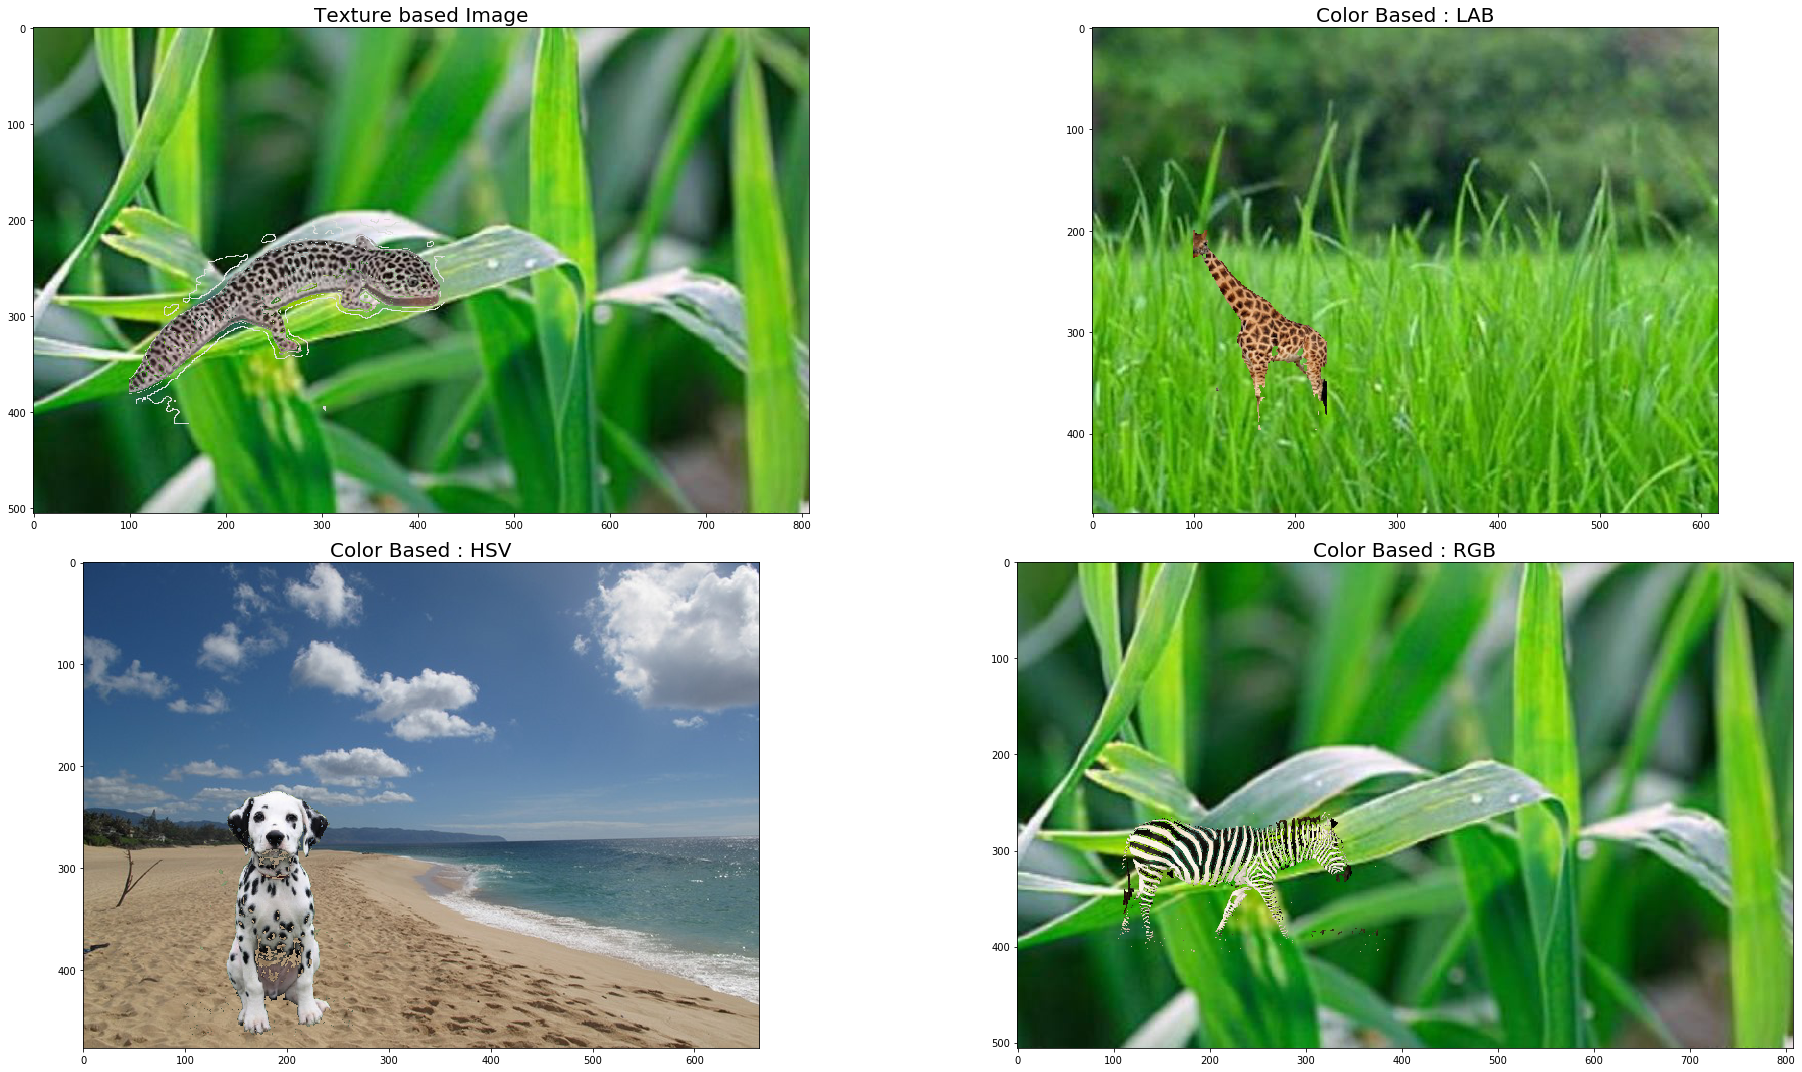

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))
ax = axes.ravel()
ax[0].imshow(trImg_texture)
ax[0].set_title("Texture based Image",fontsize=20)
ax[1].imshow(trImg_LAB)
ax[1].set_title("Color Based : LAB", fontsize=20)
ax[2].imshow(trImg_HSV)
ax[2].set_title("Color Based : HSV",fontsize=20)
ax[3].imshow(trImg_rgb)
ax[3].set_title("Color Based : RGB",fontsize=20)
plt.savefig('Img_Seg.jpg')
fig.tight_layout()
plt.show()
